In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


student_data = pd.read_csv('Prog_exam_analysis_data.csv')
display(student_data.head(5))

,Student_ID,KA1,KA2,KA3,KA4,AV_KA,Prog_Exam_Mark
0,210049.0,90.0,96.0,90.0,94.0,92.5,90
1,210115.0,72.0,80.0,58.0,58.0,67.0,73
2,210762.0,48.0,76.0,60.0,70.0,63.5,44
3,210252.0,60.0,78.0,64.0,62.0,66.0,58
4,210264.0,82.0,94.0,88.0,82.0,86.5,93


In [10]:
student_data=student_data.set_index('Student_ID')

In [14]:
display(student_data)

,KA1,KA2,KA3,KA4,AV_KA,Prog_Exam_Mark
Student_ID,,,,,,
210049.0,90.0,96.0,90.0,94.0,92.5,90
210115.0,72.0,80.0,58.0,58.0,67.0,73
210762.0,48.0,76.0,60.0,70.0,63.5,44
210252.0,60.0,78.0,64.0,62.0,66.0,58
210264.0,82.0,94.0,88.0,82.0,86.5,93
...,...,...,...,...,...,...
211366.0,54.0,98.0,48.0,80.0,70.0,71
211825.0,50.0,56.0,62.0,80.0,62.0,58
211882.0,86.0,98.0,54.0,92.0,82.5,82


In [16]:
student_data=student_data[['AV_KA','Prog_Exam_Mark']]

In [17]:
display(student_data)

,AV_KA,Prog_Exam_Mark
Student_ID,,
210049.0,92.5,90
210115.0,67.0,73
210762.0,63.5,44
210252.0,66.0,58
210264.0,86.5,93
...,...,...
211366.0,70.0,71
211825.0,62.0,58
211882.0,82.5,82


In [30]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 210049.0 to 211308.0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AV_KA           203 non-null    float64
 1   Prog_Exam_Mark  203 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.8+ KB


In [29]:
student_data=student_data.dropna()

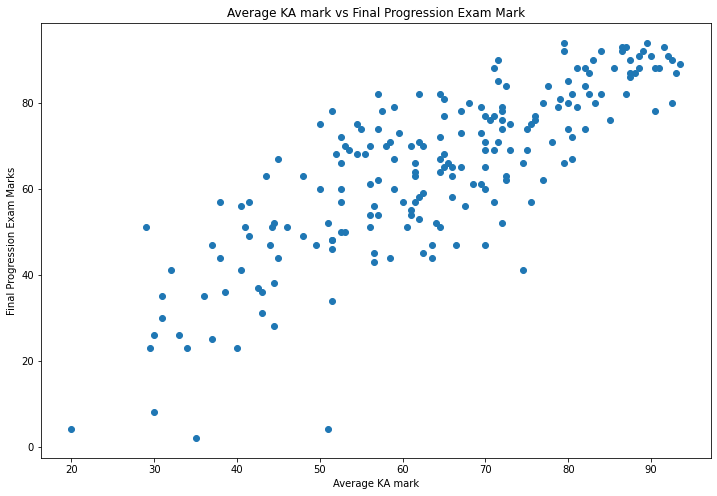

In [52]:
X = student_data[['AV_KA']]
y = student_data['Prog_Exam_Mark']
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X, y)
ax.set_title('Average KA mark vs Final Progression Exam Mark')
ax.set_xlabel('Average KA mark')
ax.set_ylabel('Final Progression Exam Marks')

plt.show()


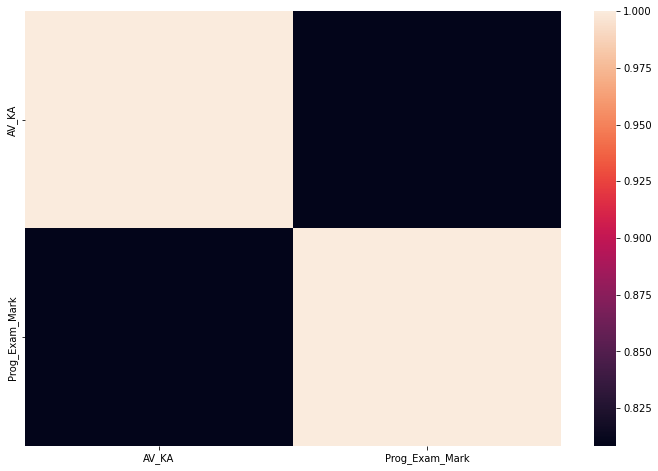

In [32]:
corr_matrix = student_data.corr(method='pearson')
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr_matrix, ax = ax)
plt.show()


In [33]:
print(corr_matrix.loc['AV_KA'])


AV_KA             1.000000
Prog_Exam_Mark    0.808406
Name: AV_KA, dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# build model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
print(lin_reg.intercept_)

4.929988967441432


In [55]:
print(lin_reg.coef_[0])


0.9467090843511882


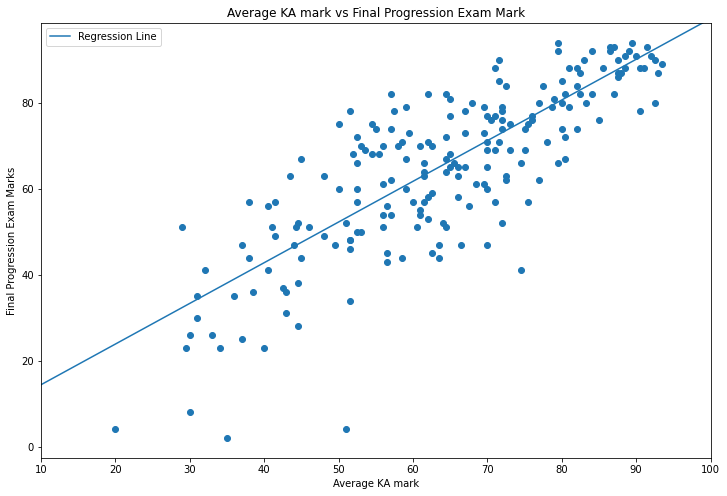

In [56]:
X = student_data[['AV_KA']]
y = student_data['Prog_Exam_Mark']
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X, y)
ax.axline((0, lin_reg.intercept_), slope=lin_reg.coef_[0], label = 'Regression Line')
ax.set_title('Average KA mark vs Final Progression Exam Mark')
ax.set_xlabel('Average KA mark')
ax.set_ylabel('Final Progression Exam Marks')
ax.set_xlim(10, 100)

plt.legend()

plt.show()


In [46]:
score = lin_reg.score(X_test, y_test)
print(score)

0.6062339702522321


In [57]:
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

12.528534902931307


In [58]:
train_score = lin_reg.score(X_train, y_train)
print('Train Score: {}, Test Score: {}'.format(train_score, score))

Train Score: 0.6607270701777312, Test Score: 0.6062339702522321


In [59]:
lin_reg_production = LinearRegression()
lin_reg_production.fit(X, y)
# make predictions
expends_predict = pd.DataFrame([44, 65, 87], columns = X_train.columns)
predictions = lin_reg_production.predict(expends_predict)
output = expends_predict.copy()
output['Predicted Prog Exam Mark'] = predictions
display(output)

,AV_KA,Predicted Prog Exam Mark
0,44,45.728492
1,65,65.600454
2,87,86.418700
